In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.preprocessing import LabelEncoder

c:\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv('ionosphere.data', header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [3]:
X = data.iloc[:, :-1]  
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

borderline_smote = BorderlineSMOTE(random_state=42, kind='borderline-1')
X_resampled_bs1, y_resampled_bs1 = borderline_smote.fit_resample(X_train, y_train)

borderline_smote2 = BorderlineSMOTE(random_state=42, kind='borderline-2')
X_resampled_bs2, y_resampled_bs2 = borderline_smote2.fit_resample(X_train, y_train)

In [5]:
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_resampled, y_resampled)

svm_classifier_bs1 = SVC(random_state=42)
svm_classifier_bs1.fit(X_resampled_bs1, y_resampled_bs1)

svm_classifier_bs2 = SVC(random_state=42)
svm_classifier_bs2.fit(X_resampled_bs2, y_resampled_bs2)

SVC(random_state=42)

In [6]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_resampled, y_resampled)

knn_classifier_bs1 = KNeighborsClassifier()
knn_classifier_bs1.fit(X_resampled_bs1, y_resampled_bs1)

knn_classifier_bs2 = KNeighborsClassifier()
knn_classifier_bs2.fit(X_resampled_bs2, y_resampled_bs2)

KNeighborsClassifier()

In [7]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_resampled, y_resampled)

rf_classifier_bs1 = RandomForestClassifier(random_state=42)
rf_classifier_bs1.fit(X_resampled_bs1, y_resampled_bs1)

rf_classifier_bs2 = RandomForestClassifier(random_state=42)
rf_classifier_bs2.fit(X_resampled_bs2, y_resampled_bs2)

RandomForestClassifier(random_state=42)

In [8]:
svm_predictions = svm_classifier.predict(X_test)
svm_predictions_bs1 = svm_classifier_bs1.predict(X_test)
svm_predictions_bs2 = svm_classifier_bs2.predict(X_test)


knn_predictions = knn_classifier.predict(X_test)
knn_predictions_bs1 = knn_classifier_bs1.predict(X_test)
knn_predictions_bs2 = knn_classifier_bs2.predict(X_test)


rf_predictions = rf_classifier.predict(X_test)
rf_predictions_bs1 = rf_classifier_bs1.predict(X_test)
rf_predictions_bs2 = rf_classifier_bs2.predict(X_test)

In [9]:
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print("SVM Classification Report:\n", classification_report(y_test, svm_predictions))
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions_bs1))
print("SVM Classification Report:\n", classification_report(y_test, svm_predictions_bs1))
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions_bs2))
print("SVM Classification Report:\n", classification_report(y_test, svm_predictions_bs2))



print("k-NN Accuracy:", accuracy_score(y_test, knn_predictions))
print("k-NN Classification Report:\n", classification_report(y_test, knn_predictions))
print("k-NN Accuracy:", accuracy_score(y_test, knn_predictions_bs1))
print("k-NN Classification Report:\n", classification_report(y_test, knn_predictions_bs1))
print("k-NN Accuracy:", accuracy_score(y_test, knn_predictions_bs2))
print("k-NN Classification Report:\n", classification_report(y_test, knn_predictions_bs2))



print("RandomForest Accuracy:", accuracy_score(y_test, rf_predictions))
print("RandomForest Classification Report:\n", classification_report(y_test, rf_predictions))
print("RandomForest Accuracy:", accuracy_score(y_test, rf_predictions_bs1))
print("RandomForest Classification Report:\n", classification_report(y_test, rf_predictions_bs1))
print("RandomForest Accuracy:", accuracy_score(y_test, rf_predictions_bs2))
print("RandomForest Classification Report:\n", classification_report(y_test, rf_predictions_bs2))

SVM Accuracy: 0.9577464788732394
SVM Classification Report:
               precision    recall  f1-score   support

           b       1.00      0.89      0.94        28
           g       0.93      1.00      0.97        43

    accuracy                           0.96        71
   macro avg       0.97      0.95      0.95        71
weighted avg       0.96      0.96      0.96        71

SVM Accuracy: 0.9436619718309859
SVM Classification Report:
               precision    recall  f1-score   support

           b       1.00      0.86      0.92        28
           g       0.91      1.00      0.96        43

    accuracy                           0.94        71
   macro avg       0.96      0.93      0.94        71
weighted avg       0.95      0.94      0.94        71

SVM Accuracy: 0.9577464788732394
SVM Classification Report:
               precision    recall  f1-score   support

           b       1.00      0.89      0.94        28
           g       0.93      1.00      0.97        43


In [10]:
def visualize(embedding, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis', s=10)
    plt.title(title)
    plt.colorbar()
    plt.show()


C:\Users\Tr3M0L0\AppData\Local\Temp\ipykernel_5264\826195592.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis', s=10)


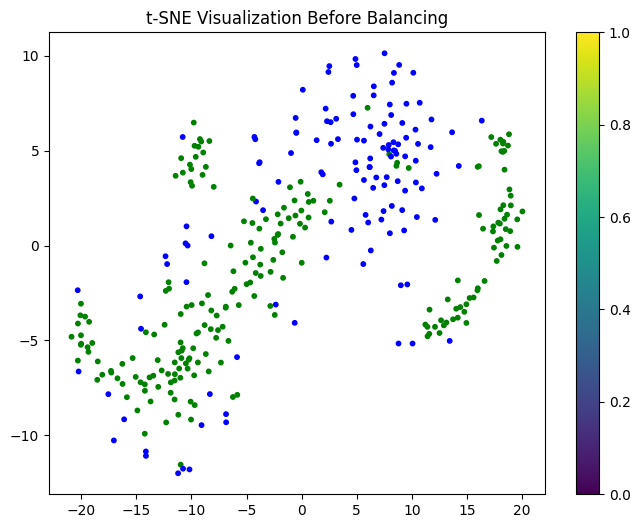

c:\Python311\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Tr3M0L0\AppData\Local\Temp\ipykernel_5264\826195592.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis', s=10)


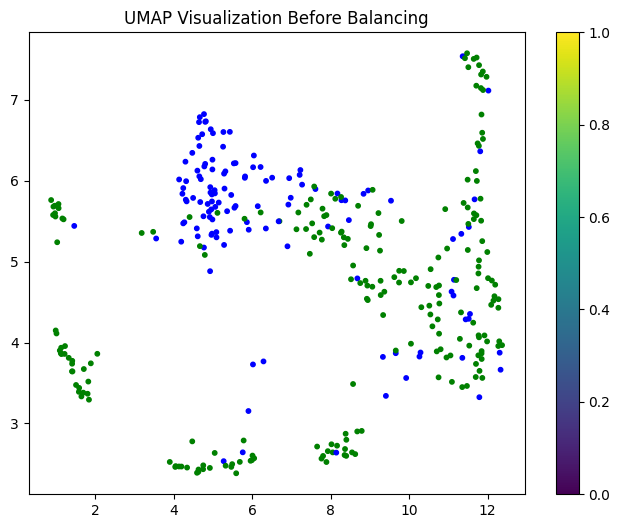

In [11]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
visualize(X_tsne, y, 't-SNE Visualization Before Balancing')


umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(X)
visualize(X_umap, y, 'UMAP Visualization Before Balancing')

C:\Users\Tr3M0L0\AppData\Local\Temp\ipykernel_5264\826195592.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis', s=10)


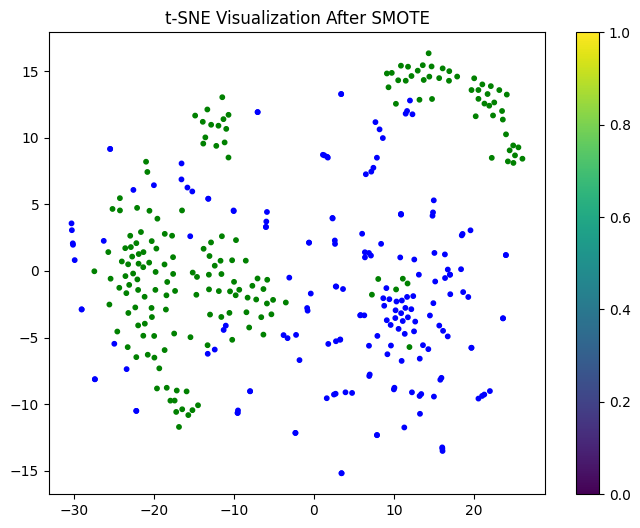

c:\Python311\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Tr3M0L0\AppData\Local\Temp\ipykernel_5264\826195592.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis', s=10)


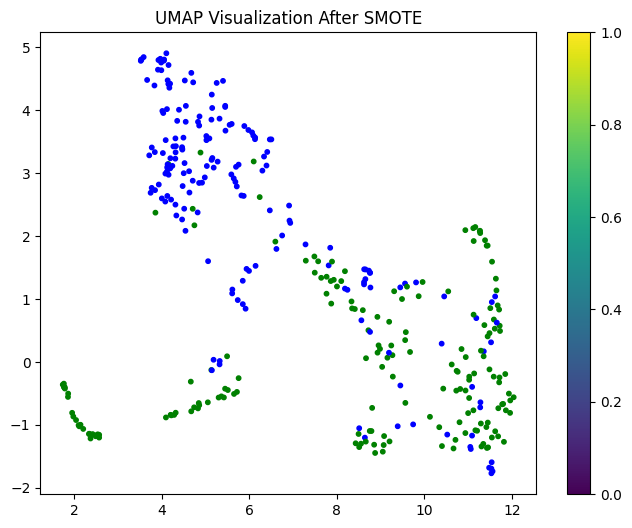

In [12]:
X_resampled_tsne = tsne.fit_transform(X_resampled)
visualize(X_resampled_tsne, y_resampled, 't-SNE Visualization After SMOTE')


X_resampled_umap = umap.fit_transform(X_resampled)
visualize(X_resampled_umap, y_resampled, 'UMAP Visualization After SMOTE')

C:\Users\Tr3M0L0\AppData\Local\Temp\ipykernel_5264\826195592.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis', s=10)


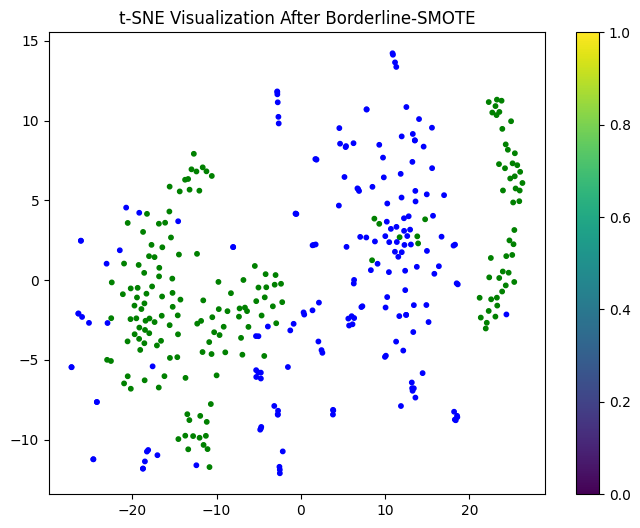

c:\Python311\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Tr3M0L0\AppData\Local\Temp\ipykernel_5264\826195592.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis', s=10)


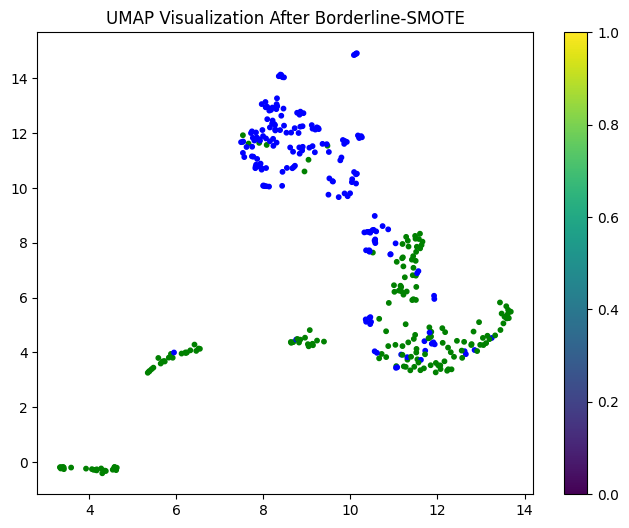

In [13]:

X_resampled_bs1_tsne = tsne.fit_transform(X_resampled_bs1)
visualize(X_resampled_bs1_tsne, y_resampled_bs1, 't-SNE Visualization After Borderline-SMOTE')


X_resampled_bs1_umap = umap.fit_transform(X_resampled_bs1)
visualize(X_resampled_bs1_umap, y_resampled_bs1, 'UMAP Visualization After Borderline-SMOTE')

C:\Users\Tr3M0L0\AppData\Local\Temp\ipykernel_5264\826195592.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis', s=10)


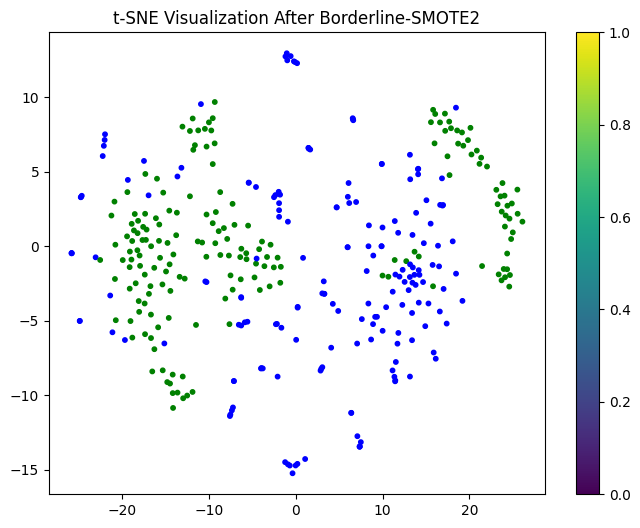

c:\Python311\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Tr3M0L0\AppData\Local\Temp\ipykernel_5264\826195592.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis', s=10)


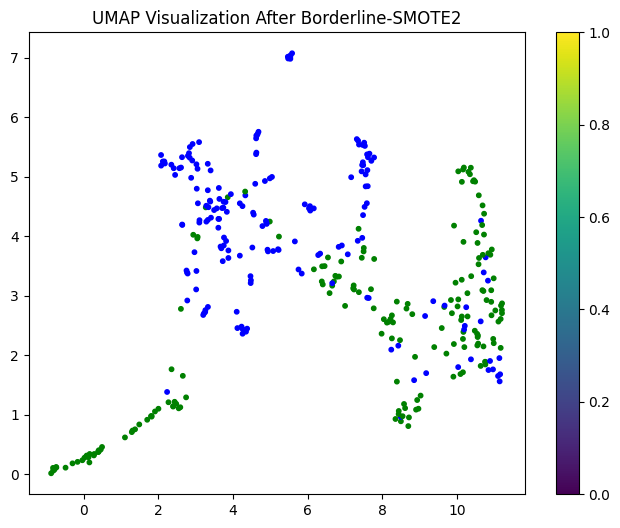

In [14]:

X_resampled_bs2_tsne = tsne.fit_transform(X_resampled_bs2)
visualize(X_resampled_bs2_tsne, y_resampled_bs2, 't-SNE Visualization After Borderline-SMOTE2')


X_resampled_bs2_umap = umap.fit_transform(X_resampled_bs2)
visualize(X_resampled_bs2_umap, y_resampled_bs2, 'UMAP Visualization After Borderline-SMOTE2')
